# Insights from City Supply and Demand Data

## Importing the Required library

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data=pd.read_csv('dataset_1.csv')

## Exploratory Data Analysis

In [11]:
data.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11


In [12]:
data.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers'],
      dtype='object')

In [13]:
data.rename(columns={'Date':'Date','Time (Local)':'Time (Local)','Eyeballs ':'Eyeballs','Zeroes ':'Zeroes','Completed Trips ':'Completed Trips','Requests ':'Requests'},inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             15 non-null     object
 1   Time (Local)     336 non-null    int64 
 2   Eyeballs         336 non-null    int64 
 3   Zeroes           336 non-null    int64 
 4   Completed Trips  336 non-null    int64 
 5   Requests         336 non-null    int64 
 6   Unique Drivers   336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


In [15]:
data['Date']=data['Date'].fillna(method='ffill')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             336 non-null    object
 1   Time (Local)     336 non-null    int64 
 2   Eyeballs         336 non-null    int64 
 3   Zeroes           336 non-null    int64 
 4   Completed Trips  336 non-null    int64 
 5   Requests         336 non-null    int64 
 6   Unique Drivers   336 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 18.5+ KB


### Combine 'Date' and 'Time' columns into a single datetime column

In [17]:

data['Date_Time'] = pd.to_datetime(data['Date'] + ' ' + data['Time (Local)'].astype(str) + ':00:00', format='%d-%b-%y %H:%M:%S')

In [18]:
data.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Date_Time
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00
3,10-Sep-12,10,9,2,0,1,14,2012-09-10 10:00:00
4,10-Sep-12,11,11,1,4,4,11,2012-09-10 11:00:00


### Converting object to Date

In [19]:
data['Date']=pd.to_datetime(data['Date'])
data['Date_Time']=pd.to_datetime(data['Date_Time'])


## Assignment 

### 1. Which date had the most completed trips during the two week period?

In [20]:
data['Date'].nunique()

15

In [21]:
data.columns

Index(['Date', 'Time (Local)', 'Eyeballs', 'Zeroes', 'Completed Trips',
       'Requests', 'Unique Drivers', 'Date_Time'],
      dtype='object')

In [22]:
agg=data.groupby('Date')['Completed Trips'].agg(['sum']).reset_index()

In [23]:
agg.columns

Index(['Date', 'sum'], dtype='object')

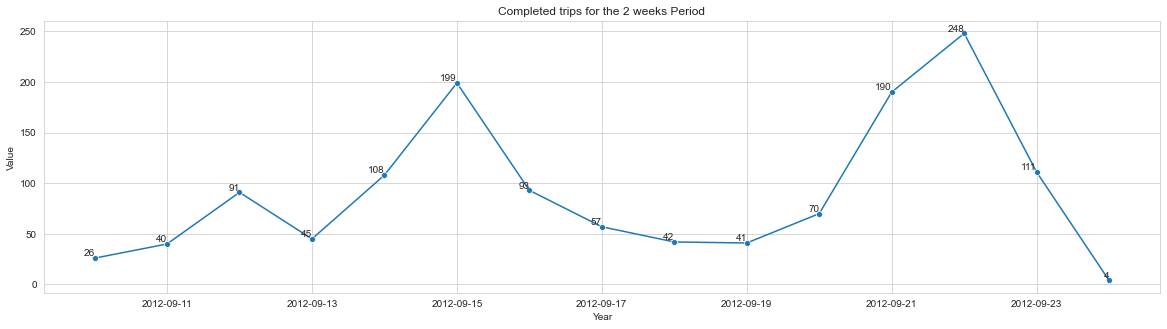

In [24]:
plt.figure(figsize=(20, 5))  # Set the figure size (optional)
sns.set_style("whitegrid")
sns.lineplot(data=agg, x='Date', y='sum', marker='o')
plt.title('Completed trips for the 2 weeks Period')
plt.xlabel('Year')
plt.ylabel('Value')
for index, row in agg.iterrows():
    plt.text(row['Date'], row['sum'], str(row['sum']), ha='right', va='bottom')
plt.show()


In [25]:
most_completed=agg.nlargest(1, 'sum')

In [26]:
print(f"The date that had the most completed trips during the two week period is {most_completed['Date']} and total trip was{most_completed['sum']} ")

The date that had the most completed trips during the two week period is 12   2012-09-22
Name: Date, dtype: datetime64[ns] and total trip was12    248
Name: sum, dtype: int64 


### 2. What was the highest number of completed trips within a 24 hour period?

In [27]:
rolling_sum=data.copy()

In [28]:
rolling_sum.set_index("Date_Time")

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
Date_Time,,,,,,,
2012-09-10 07:00:00,2012-09-10,7,5,0,2,2,9
2012-09-10 08:00:00,2012-09-10,8,6,0,2,2,14
2012-09-10 09:00:00,2012-09-10,9,8,3,0,0,14
2012-09-10 10:00:00,2012-09-10,10,9,2,0,1,14
2012-09-10 11:00:00,2012-09-10,11,11,1,4,4,11
...,...,...,...,...,...,...,...
2012-09-24 02:00:00,2012-09-24,2,3,3,0,2,0
2012-09-24 03:00:00,2012-09-24,3,3,3,0,1,0
2012-09-24 04:00:00,2012-09-24,4,1,1,0,0,0


In [29]:
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=24)
rolling_sum['Rolling Sum']=rolling_sum['Completed Trips'].rolling(window=indexer, min_periods=1).sum()

In [30]:
rolling_sum['End_Time'] = rolling_sum['Date_Time'] + pd.Timedelta(hours=24)
rolling_sum.rename(columns={'Date_Time':'Start_Time','Rolling Sum':'Total_Trips'},inplace=True)
rolling_sum = rolling_sum[['Start_Time', 'End_Time', 'Total_Trips']]
rolling_sum.nlargest(1,'Total_Trips')

,Start_Time,End_Time,Total_Trips
274,2012-09-21 17:00:00,2012-09-22 17:00:00,278.0


### 3. Which hour of the day had the most requests during the two week period?

In [31]:
hour=data.groupby(['Time (Local)'])['Requests'].agg(['sum']).reset_index()

In [32]:
hour.nlargest(1,'sum')

,Time (Local),sum
23,23,184


### 4. What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)? Tip: The local time value is the start of the hour (e.g. 15 is the hour from 3:00pm - 4:00pm)

In [33]:
weekend=data.copy()

In [34]:
weekend['Weekday'] = weekend['Date'].dt.weekday

In [35]:
def week(a,b):
    if (a==4) and (b > 16):
        return "Weekend"
    elif (a==5) and (b >=0):
        return "Weekend"
    elif (a==6) and (b >=0) and (b < 3):
        return "Weekend"
    else:
        return "Weekday"
    

In [36]:
weekend['Result'] = weekend.apply(lambda row: week(row['Weekday'], row['Time (Local)']), axis=1)

In [37]:
str(round(weekend[weekend['Result']=="Weekend"]['Zeroes'].sum()/weekend['Zeroes'].sum()*100,2))+str("%")

'44.86%'

### 5.What is the weighted average ratio of completed trips per driver during the two week period? 
Tip: "Weighted average" means your answer should account for the total trip volume in each hour to determine the most accurate number in whole period.

In [38]:
Weight=weekend.copy()

In [39]:
Weight['Ratio of Completed Trip']=Weight['Completed Trips']/Weight['Unique Drivers']
Weight=Weight[Weight['Unique Drivers']>0]
Weight['Weight_Aver']=Weight['Ratio of Completed Trip']*Weight['Completed Trips']
Weight_avg_Ratio=str(round((Weight['Weight_Aver'].sum()/Weight['Completed Trips'].sum())*100,2))+str("%")
print(f"The weighted average ratio of completed trips per driver during the two week period is {Weight_avg_Ratio}")

The weighted average ratio of completed trips per driver during the two week period is 82.83%


### 6.In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.

In [40]:
schedule = data.copy()
schedule.rename(columns={'Date_Time':'Start_Time'},inplace= True)
schedule_eight = schedule.set_index("Start_Time").resample('8H').sum()
schedule_eight['Time Group']  = schedule_eight.index.strftime("%Y/%m/%d %H:%M") +  "-" + (schedule_eight.index + pd.Timedelta('8 hours')).strftime("%Y/%m/%d %H:%M")

In [41]:
schedule_eight.nlargest(1,'Requests').reset_index()

,Start_Time,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Time Group
0,2012-09-21 16:00:00,156,515,88,153,192,198,2012/09/21 16:00-2012/09/22 00:00


### 7.True or False: Driver supply always increases when demand increases during the two week period.

Tip: Visualize the data to confirm your answer if needed.

In [42]:
difference_df = pd.DataFrame(data['Date_Time'])
difference_df['request_diff'] = data['Requests'].shift(-1) - data['Requests']
difference_df['supply_diff'] = data['Unique Drivers'].shift(-1) - data['Unique Drivers']
(difference_df[difference_df['request_diff'] > 0]['supply_diff'] > 0).all().item()

False

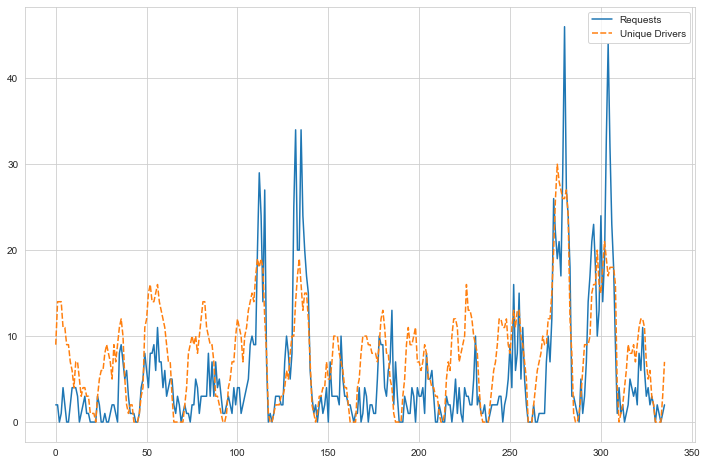

In [43]:
plt.figure(figsize=(12,8))
sns.lineplot(data=data[['Requests', 'Unique Drivers', 'Date_Time']])
plt.show()

### 8.In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

In [44]:
Zero_Eye=data.copy()

In [45]:
Zero_Eye.set_index("Date_Time")

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
Date_Time,,,,,,,
2012-09-10 07:00:00,2012-09-10,7,5,0,2,2,9
2012-09-10 08:00:00,2012-09-10,8,6,0,2,2,14
2012-09-10 09:00:00,2012-09-10,9,8,3,0,0,14
2012-09-10 10:00:00,2012-09-10,10,9,2,0,1,14
2012-09-10 11:00:00,2012-09-10,11,11,1,4,4,11
...,...,...,...,...,...,...,...
2012-09-24 02:00:00,2012-09-24,2,3,3,0,2,0
2012-09-24 03:00:00,2012-09-24,3,3,3,0,1,0
2012-09-24 04:00:00,2012-09-24,4,1,1,0,0,0


In [46]:
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=72)
df_agg_three_days = Zero_Eye.set_index("Date_Time").rolling(window=indexer, min_periods=1).sum().reset_index()
df_agg_three_days['zeros_to_eyeballs_ratio'] = df_agg_three_days['Zeroes'] / df_agg_three_days['Eyeballs']

In [53]:
df_agg_three_days = df_agg_three_days[df_agg_three_days['Date_Time'] <= (df_agg_three_days['Date_Time'].max() - pd.Timedelta(days=3))]

time_format = "%Y/%m/%d %H:%M"
df_agg_three_days['Time Interval']  = df_agg_three_days['Date_Time'].dt.strftime(time_format) +  "-" + (df_agg_three_days['Date_Time'] + pd.Timedelta('3 days')).dt.strftime(time_format)
df_agg_three_days


c:\Users\aravi\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Date_Time,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,zeros_to_eyeballs_ratio,Time Interval
0,2012-09-10 07:00:00,828.0,956.0,172.0,159.0,211.0,473.0,0.179916,2012/09/10 07:00-2012/09/13 07:00
1,2012-09-10 08:00:00,828.0,961.0,173.0,158.0,210.0,468.0,0.180021,2012/09/10 08:00-2012/09/13 08:00
2,2012-09-10 09:00:00,828.0,964.0,174.0,157.0,209.0,462.0,0.180498,2012/09/10 09:00-2012/09/13 09:00
3,2012-09-10 10:00:00,828.0,970.0,175.0,157.0,209.0,457.0,0.180412,2012/09/10 10:00-2012/09/13 10:00
4,2012-09-10 11:00:00,828.0,976.0,176.0,159.0,210.0,453.0,0.180328,2012/09/10 11:00-2012/09/13 11:00
...,...,...,...,...,...,...,...,...,...
187,2012-09-18 02:00:00,828.0,1035.0,190.0,163.0,231.0,510.0,0.183575,2012/09/18 02:00-2012/09/21 02:00
188,2012-09-18 03:00:00,828.0,1031.0,181.0,164.0,226.0,515.0,0.175558,2012/09/18 03:00-2012/09/21 03:00
189,2012-09-18 04:00:00,828.0,1030.0,180.0,164.0,223.0,515.0,0.174757,2012/09/18 04:00-2012/09/21 04:00
190,2012-09-18 05:00:00,828.0,1029.0,179.0,164.0,223.0,515.0,0.173955,2012/09/18 05:00-2012/09/21 05:00


In [54]:
df_agg_three_days.nlargest(1, 'zeros_to_eyeballs_ratio')['zeros_to_eyeballs_ratio']


118    0.292977
Name: zeros_to_eyeballs_ratio, dtype: float64

In [55]:
df_agg_three_days.nlargest(1, 'zeros_to_eyeballs_ratio')['Time Interval']


118    2012/09/15 05:00-2012/09/18 05:00
Name: Time Interval, dtype: object

### 9.If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to?

In [57]:
df_agg_time = data.groupby('Time (Local)').sum().reset_index()
df_agg_time['eyeball_to_driver_ratio'] = df_agg_time['Eyeballs'] / df_agg_time['Unique Drivers'] 
df_agg_time.nlargest(1, 'eyeball_to_driver_ratio')

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,eyeball_to_driver_ratio
23,23,488,193,126,184,119,4.10084


In [58]:
df_agg_time.nlargest(1, 'eyeball_to_driver_ratio')['Time (Local)']

23    23
Name: Time (Local), dtype: int64

### 10.True or False: There is exactly two weeks of data in this analysis

In [59]:

(data['Date_Time'][data.shape[0]-1]-data['Date_Time'][0])

Timedelta('13 days 23:00:00')

In [60]:
pd.Timedelta('14 days') == data['Date_Time'][data.shape[0]-1]-data['Date_Time'][0]

False

In [61]:
pd.Timedelta('14 days') > data['Date_Time'][data.shape[0]-1]-data['Date_Time'][0]

True

### 11.Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums)

Tip: Visualize the data to confirm your answer if needed.

In [63]:
# find min supply and demand per day
df_min_supply_per_day = data.groupby(['Date'])['Unique Drivers'].min().reset_index().rename(columns={'Unique Drivers':'min_supply_per_day'})
df_min_demand_per_day = data.groupby(['Date'])['Requests'].min().reset_index().rename(columns={'Requests':'min_demand_per_day'})

# merge demand and supply based on date
supply_demand = pd.merge(df_min_supply_per_day, df_min_demand_per_day, on="Date")
supply_demand

,Date,min_supply_per_day,min_demand_per_day
0,2012-09-10,3,0
1,2012-09-11,0,0
2,2012-09-12,0,0
3,2012-09-13,0,0
4,2012-09-14,0,1
5,2012-09-15,0,0
6,2012-09-16,0,0
7,2012-09-17,0,0
8,2012-09-18,0,0
9,2012-09-19,0,0


In [64]:
# merge found min values with initial dataset on Date
dataset_w_min_supply_demand = pd.merge(data, supply_demand, on="Date")
dataset_w_min_supply_demand

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Date_Time,min_supply_per_day,min_demand_per_day
0,2012-09-10,7,5,0,2,2,9,2012-09-10 07:00:00,3,0
1,2012-09-10,8,6,0,2,2,14,2012-09-10 08:00:00,3,0
2,2012-09-10,9,8,3,0,0,14,2012-09-10 09:00:00,3,0
3,2012-09-10,10,9,2,0,1,14,2012-09-10 10:00:00,3,0
4,2012-09-10,11,11,1,4,4,11,2012-09-10 11:00:00,3,0
...,...,...,...,...,...,...,...,...,...,...
331,2012-09-24,2,3,3,0,2,0,2012-09-24 02:00:00,0,0
332,2012-09-24,3,3,3,0,1,0,2012-09-24 03:00:00,0,0
333,2012-09-24,4,1,1,0,0,0,2012-09-24 04:00:00,0,0
334,2012-09-24,5,4,2,1,1,3,2012-09-24 05:00:00,0,0


In [65]:
# check the exact matches with natural minimums
min_point = dataset_w_min_supply_demand[(dataset_w_min_supply_demand.min_supply_per_day == dataset_w_min_supply_demand['Unique Drivers']) & 
                           (dataset_w_min_supply_demand.min_demand_per_day == dataset_w_min_supply_demand['Requests'])]['Time (Local)'].mode()
min_point

0    4
dtype: int64

In [66]:
# minimum hour is 4 am
min_point[0]

4

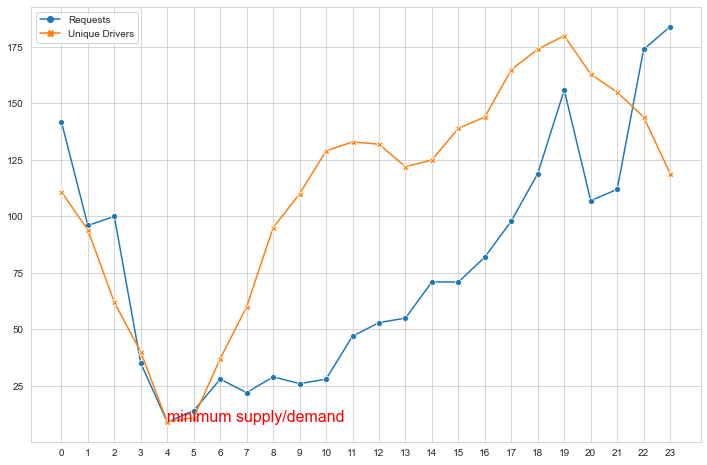

In [67]:
# plot and annotate the minimum hour
df_agg_time = data.groupby('Time (Local)').sum().reset_index()
min_point_value = df_agg_time['Requests'][min_point[0]]
plt.figure(figsize=(12,8))
fig = sns.lineplot(data=df_agg_time[['Requests', 'Unique Drivers']], markers=True, dashes=False)
fig.set_xticks(df_agg_time['Time (Local)'])
plt.annotate('minimum supply/demand', xy=(min_point[0], min_point_value), color='r', fontsize=16)
plt.show()